In [36]:
import pandas as pd 
data=pd.read_csv(r"C:\Users\91790\Downloads\kuttu ma kuttu.csv")
data

,Date,CO,Ozone,NO,NO2,NOX,NH3,SO2,PM2.5,PM10,AQI
0,01-01-2024,0.81,12.00,5.70,11.60,17.40,8.80,6.60,31.00,59.00,59.0
1,02-01-2024,0.66,13.40,5.80,11.60,17.50,8.90,8.90,39.00,64.00,65.0
2,03-01-2024,0.55,16.90,5.80,11.50,17.30,8.80,10.30,34.00,61.00,61.0
3,04-01-2024,0.83,13.70,5.80,11.60,17.40,8.80,9.20,35.00,60.00,60.0
4,05-01-2024,0.50,14.80,5.70,11.50,17.20,8.80,8.40,21.00,37.00,37.0
...,...,...,...,...,...,...,...,...,...,...,...
2401,27-12-2023,56.28,23.96,5.97,0.56,2.81,5.04,7.51,2.19,32.20,0.5
2402,28-12-2023,54.96,23.37,5.05,0.84,2.75,5.00,7.51,2.21,32.05,0.5
2403,29-12-2023,56.11,23.89,5.71,1.07,2.80,4.95,7.51,2.22,32.05,0.5
2404,30-12-2023,55.25,23.50,6.07,0.85,2.76,5.03,7.58,2.23,32.18,0.5


In [37]:
data.isnull().sum()

Date     0
CO       0
Ozone    0
NO       0
NO2      0
NOX      0
NH3      0
SO2      0
PM2.5    0
PM10     0
AQI      0
dtype: int64

In [38]:
data.duplicated().sum()

np.int64(0)

In [39]:
data.dropna(inplace=True)
data.isnull().sum()

Date     0
CO       0
Ozone    0
NO       0
NO2      0
NOX      0
NH3      0
SO2      0
PM2.5    0
PM10     0
AQI      0
dtype: int64

In [40]:
x=data[['CO','Ozone','NO','NO2','NOX','NH3','SO2','PM2.5','PM10']]
y=data[['AQI']]
y

,AQI
0,59.0
1,65.0
2,61.0
3,60.0
4,37.0
...,...
2401,0.5
2402,0.5
2403,0.5
2404,0.5


In [41]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2)
x_test

,CO,Ozone,NO,NO2,NOX,NH3,SO2,PM2.5,PM10
101,0.45000,11.0000,8.10000,7.8000,15.9000,5.0000,8.60000,5.00000,11.00000
213,67.63000,26.9400,4.57000,0.5400,1.8100,5.3000,7.03000,1.82000,36.23000
78,0.51000,16.7000,8.10000,7.9000,16.0000,5.0000,9.70000,14.00000,31.00000
811,0.38000,9.2000,0.71000,9.2100,9.9200,2.3800,9.45000,14.75000,33.50000
976,91.95000,45.0100,0.41000,0.1300,10.5000,18.1900,25.00000,10.52000,22.66000
...,...,...,...,...,...,...,...,...,...
1928,58.00000,29.0000,0.00000,2.0000,5.0000,12.0000,32.00000,5.00000,39.00000
2371,55.76000,23.7300,4.95000,0.7500,2.7900,5.0100,7.53000,2.18000,32.28000
139,0.38845,21.0591,2.21622,12.4405,14.6672,12.1701,10.84607,30.58333,68.04166
862,0.97000,16.2900,0.67000,9.2200,9.9000,2.3600,8.95000,3.42000,17.75000


In [42]:
from sklearn.linear_model import LinearRegression
le1=LinearRegression()
le1.fit(x_train,y_train)

LinearRegression()

In [43]:
le1.predict(x_test)

array([[12.717416  ],
       [10.66831187],
       [26.65403117],
       ...,
       [70.05796409],
       [29.9042721 ],
       [ 5.35837213]], shape=(1924, 1))

In [44]:
import pickle
f=open('li.pkl', 'wb')
pickle.dump(le1, f)
f.close()


In [45]:
f=open('li.pkl','rb')
li=pickle.load(f)
f.close()

<Axes: xlabel='AQI', ylabel='Count'>

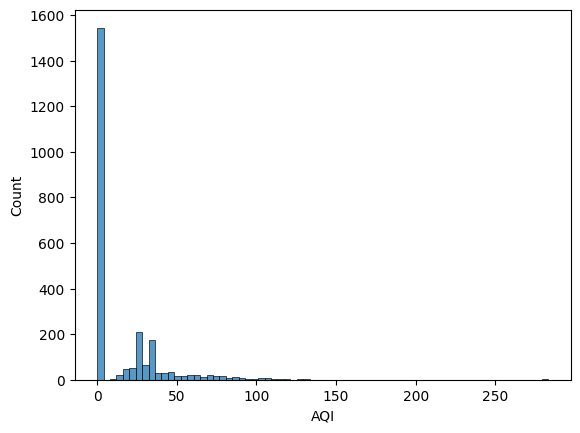

In [46]:
import seaborn as sns
sns.histplot(data["AQI"])

In [47]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [48]:
data=dt_regressor.predict(x_test)
data

array([20.  ,  0.99, 29.  , ..., 62.  , 26.  ,  0.85], shape=(1924,))

In [49]:
from sklearn.metrics import r2_score
y_pred = dt_regressor.predict(x_test)
r2_score(y_test,y_pred)

0.7920775468218036

In [50]:
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))

MSE 116.55229734927235


In [51]:
import numpy as np
print("RME",np.sqrt(mean_squared_error(y_test,y_pred)))

RME 10.795938928563478


In [52]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

C:\Users\91790\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [53]:
data=model.predict(x_test)
data

array([22.47  ,  0.9883, 34.1854, ..., 62.57  , 35.38  ,  5.6875],
      shape=(1924,))

In [54]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.8592936237808932

In [55]:
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))

MSE 78.87388374536383


In [56]:
import numpy as np
print("RME",np.sqrt(mean_squared_error(y_test,y_pred)))

RME 8.881096989976172


In [57]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [58]:
pre=knn_regressor.predict(x_test)
pre


array([[23.8  ],
       [ 0.958],
       [31.2  ],
       ...,
       [67.6  ],
       [44.8  ],
       [ 0.968]], shape=(1924, 1))

In [59]:
from sklearn.metrics import r2_score
y_pred = li.predict(x_test)
r2_score(y_test, y_pred)

0.7266692124999548

In [60]:
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))

MSE 153.2173689395309


In [61]:
import numpy as np
print("RME",np.sqrt(mean_squared_error(y_test, y_pred)))

RME 12.378100376856333


In [62]:
import matplotlib.pyplot as plt

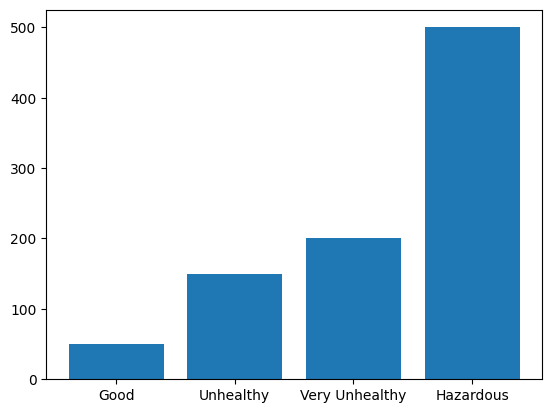

In [63]:
categories=['Good','Unhealthy','Very Unhealthy','Hazardous']
values= [50,150,200,500]
plt.bar(categories,values)
plt.show()